In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder





In [3]:
datasetIndex = 4

if datasetIndex == 1:
    dataSetPath = r"E:\pythonProject\HITEC_Codes\1_DataSets\life_insurance_data.csv"
elif datasetIndex == 2:
    dataSetPath = r"E:\pythonProject\HITEC_Codes\1_DataSets\googleplaystore.csv"
elif datasetIndex == 3:
    dataSetPath = r"E:\pythonProject\HITEC_Codes\1_DataSets\framingham_Heart_Disease_Dataset.csv"
elif datasetIndex == 4:
    dataSetPath = r"E:\pythonProject\HITEC_Codes\1_DataSets\iris.csv"

dataSetName = os.path.basename(dataSetPath)
dataset = pd.read_csv(dataSetPath)
dataset.head()

print(f"{dataSetName} Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"{dataSetName} Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in {dataSetName} File: {totalNumberOfRowInActualDataset}")

iris.csv Columns: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
****************************
iris.csv Shape: (150, 5)
****************************
Total Rows in iris.csv File: 150


In [4]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

Dataset Shape after removing duplcates: (149, 5)
****************************
Remaining Rows in Dataset: 149
****************************
Total Duplicates: 1


In [5]:
# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")

Remaining Rows in Dataset: 149
****************************
Removed Number of rows containing Null Values: 0


In [6]:
 # Encode the target column if it's categorical
if cleanedDataset[cleanedDataset.columns.to_list()[-1]].dtype == 'object':
    cleanedDataset[cleanedDataset.columns.to_list()[-1]] = cleanedDataset[cleanedDataset.columns.to_list()[-1]].astype('category').cat.codes


In [7]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 6.0 KB


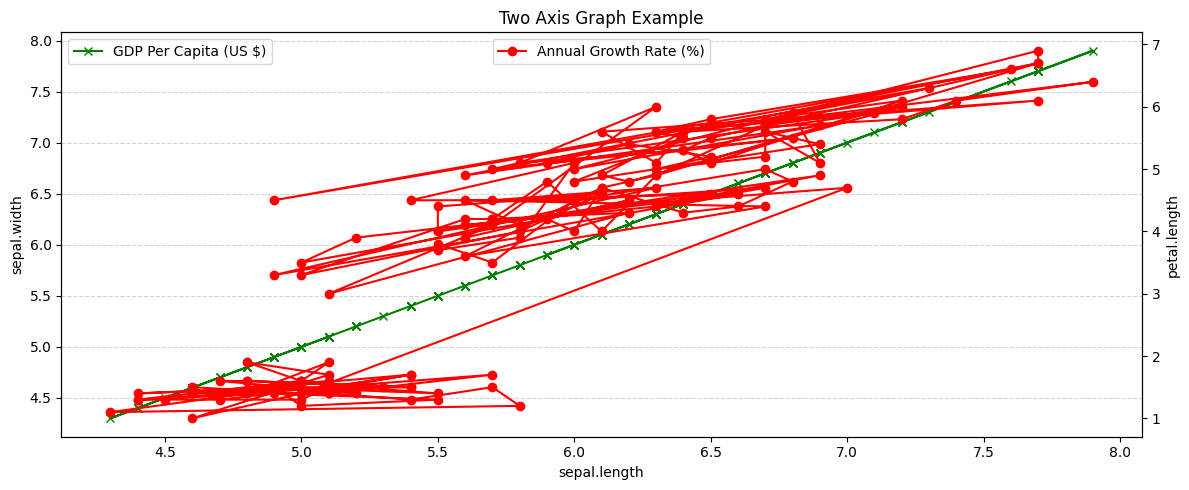

In [ ]:
# Scatterplot of features
firstFeatureIndex = 0
secondFeatureIndex = 1
thirdFeatureIndex = 2


fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

ax.set_title('Two Axis Graph Example')
ax.set_xlabel(cleanedDataset.columns.to_list()[firstFeatureIndex])
ax.plot(cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], color='green', marker='x')
ax2.plot(cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], cleanedDataset[cleanedDataset.columns.to_list()[thirdFeatureIndex]], color='red', marker='o')
ax.set_ylabel(cleanedDataset.columns.to_list()[secondFeatureIndex])
ax2.set_ylabel(cleanedDataset.columns.to_list()[thirdFeatureIndex])

ax.legend(cleanedDataset.columns.to_list()[secondFeatureIndex])
ax2.legend(cleanedDataset.columns.to_list()[thirdFeatureIndex], loc='upper center')

ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()